<h1>Microproyecto #3</h1>
<h2>Equipo 2</h2>
<p>
Estudiantes: <br>
Carlos Jose Quijano Valencia <br>
Jose Fernando López Ramírez <br>
Juan David Cortés Amador
</p>

In [354]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [355]:
df = pd.read_csv('anticonceptivo.csv')
df.head()

,Edad de la esposa,Educación de la esposa,Educación del esposo,Número de hijos nacidos,Religión de la esposa,¿La esposa ahora está trabajando?,Ocupación del esposo,Índice de nivel de vida,Exposición a los medios anticonceptivos,Método anticonceptivo utilizado
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [356]:
#la esposa está trabajando esta al revez y exposicion a los medios esta al revez
df_copy = df.copy()
df_copy['¿La esposa ahora está trabajando?'] = df['¿La esposa ahora está trabajando?'].map({1: 0, 0: 1})
df_copy['Exposición a los medios anticonceptivos'] = df['Exposición a los medios anticonceptivos'].map({1: 0, 0: 1})
df_copy.head()

,Edad de la esposa,Educación de la esposa,Educación del esposo,Número de hijos nacidos,Religión de la esposa,¿La esposa ahora está trabajando?,Ocupación del esposo,Índice de nivel de vida,Exposición a los medios anticonceptivos,Método anticonceptivo utilizado
0,24,2,3,3,1,0,2,3,1,1
1,45,1,3,10,1,0,3,4,1,1
2,43,2,3,7,1,0,3,4,1,1
3,42,3,2,9,1,0,3,3,1,1
4,36,3,3,8,1,0,3,2,1,1


In [357]:
#eliminamos la columna categorica ordinal
df_cleaned = df_copy.drop(columns=['Ocupación del esposo'])
df_cleaned.head()

,Edad de la esposa,Educación de la esposa,Educación del esposo,Número de hijos nacidos,Religión de la esposa,¿La esposa ahora está trabajando?,Índice de nivel de vida,Exposición a los medios anticonceptivos,Método anticonceptivo utilizado
0,24,2,3,3,1,0,3,1,1
1,45,1,3,10,1,0,4,1,1
2,43,2,3,7,1,0,4,1,1
3,42,3,2,9,1,0,3,1,1
4,36,3,3,8,1,0,2,1,1


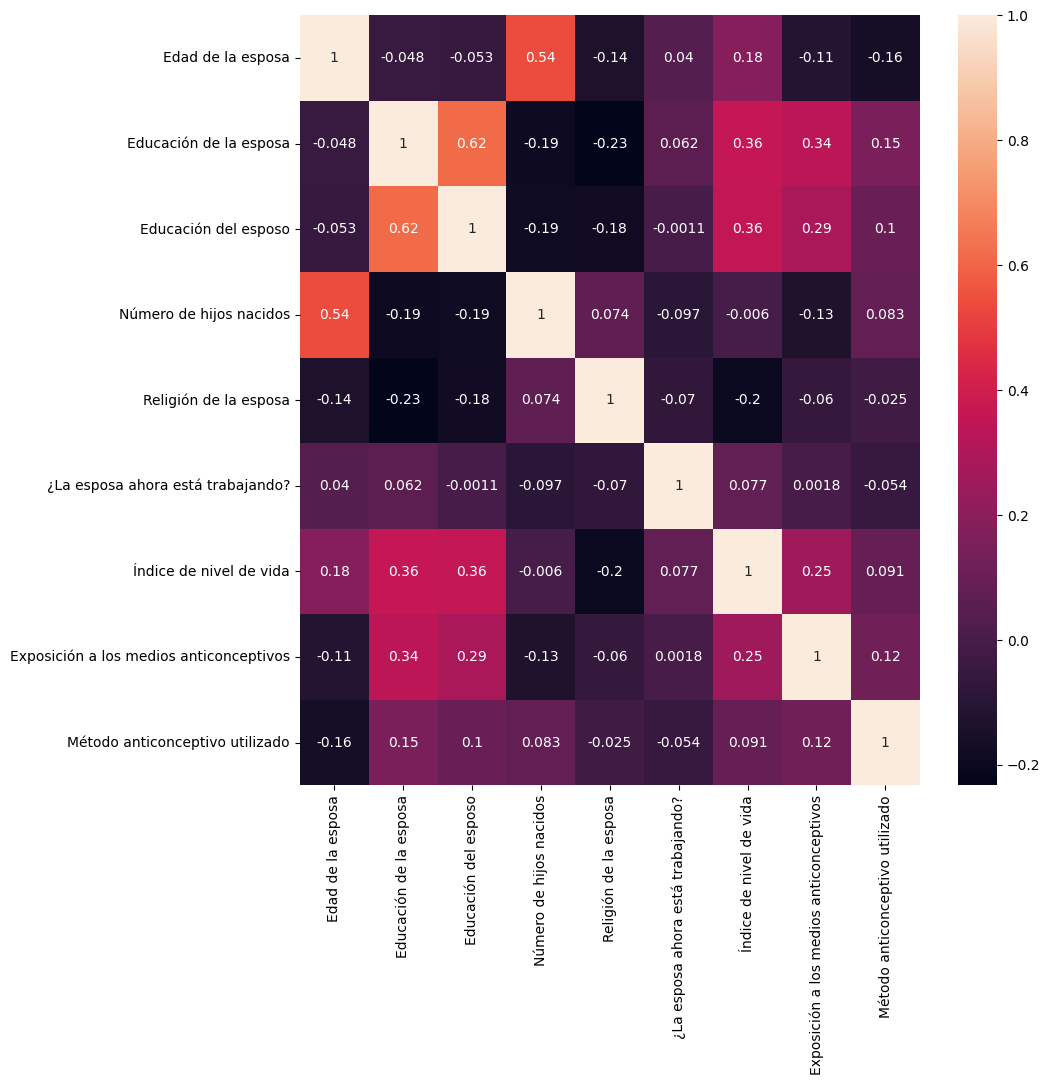

In [358]:
#Matrix de correlacion
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(correlation_matrix, annot=True)
plt.show()

In [359]:
#Mezclamos los datos
df_cleaned = df_cleaned.sample(frac=1).reset_index(drop=True)


In [360]:
#Separamos los datos
X = df_cleaned.drop(columns=['Método anticonceptivo utilizado'])
y = df_cleaned['Método anticonceptivo utilizado']

In [361]:
# SelectKBest
selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)

# Obtener scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
scores = scores.sort_values('Score', ascending=False)

print("Importancia de características:")
print(scores)

Importancia de características:
                                   Feature      Score
1                   Educación de la esposa  71.853562
0                        Edad de la esposa  33.289739
6                  Índice de nivel de vida  31.509675
2                     Educación del esposo  25.206981
7  Exposición a los medios anticonceptivos  16.099058
3                  Número de hijos nacidos  13.452832
4                    Religión de la esposa  10.949670
5        ¿La esposa ahora está trabajando?   2.597444


Mejores parámetros: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mejor exactitud: 0.5365

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.68      0.62      0.65       135
           2       0.33      0.52      0.40        66
           3       0.56      0.40      0.47        94

    accuracy                           0.53       295
   macro avg       0.52      0.51      0.51       295
weighted avg       0.56      0.53      0.54       295



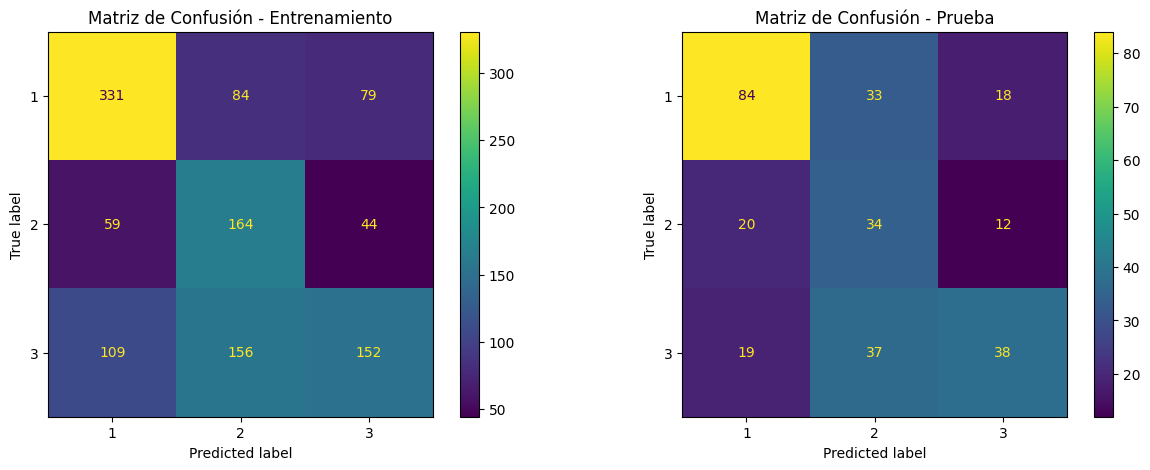

In [362]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor exactitud: {grid_search.best_score_:.4f}")

y_pred = best_model.predict(X_test)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


# Matriz de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_estimator(best_model, X_train, y_train, ax=ax1)
ax1.set_title('Matriz de Confusión - Entrenamiento')
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax2)
ax2.set_title('Matriz de Confusión - Prueba')
plt.show()

In [363]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_model, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['Clase 1', 'Clase 2', 'Clase 3'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Guarda el árbol como archivo .pdf
graph.view()  # Abre el archivo en el visor predeterminado


'decision_tree.pdf'

In [364]:
# Predicciones
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Métricas de rendimiento
print("Exactitud en entrenamiento: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Exactitud en prueba: {:.2f}".format(accuracy_score(y_test, y_pred_test)))

print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

Exactitud en entrenamiento: 0.55
Exactitud en prueba: 0.53

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           1       0.68      0.62      0.65       135
           2       0.33      0.52      0.40        66
           3       0.56      0.40      0.47        94

    accuracy                           0.53       295
   macro avg       0.52      0.51      0.51       295
weighted avg       0.56      0.53      0.54       295

